# Globalcide: homicide and suicide trends around the globe

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendations">Further Recommendations</a></li>
<li><a href="#appendix">Appendix</a></li>
</ul>

Note to reader: this report generates graphics using Seaborn version 0.9.0 or greater. Please upgrade to this version before executing the cells. 

<a id='intro'></a>
## Introduction
The purpose of this analysis is to investigate trends of murder and suicide rates for a selection of countries around the world. The dataset uses <a href="https://www.gapminder.org/data/">sources</a> curated by <img src="https://www.gapminder.org/wp-content/themes/gapminder/images/logo.png" alt="Gapfinder"> who "develop free teaching material to dismantle misconceptions and promote a fact-based worldview". Find out more about the Gapfinder vision <a href="https://www.gapminder.org/about-gapminder/">here</a>. 

The investigation is intended to answer the following initial questions using the available data:
<ol>
<li>How are murder and suicide rates in each country changing over time? </li>
<li>How do these rates change for different age groups? </li>
<li>Is there a correlation between murder and suicide rates?</li>
<li>Do the mean murder and suicide rates since the year 2000 across all countries correlate with other indicators for that period?</li>
</ol>
For each of these questions, how do G20 (see definition below) countries compare to non-G20 countries?
<p>
The data for suicides and murders is given per 100,000 population ("per 100K") and is divided into 5 age groups: 0-14, 15-29, 30-44, 45-59, and 60+.
<p>
From the set of indicators available at Gapminder, the following ("other indicators") were selected to be of interest in comparing them to the murder and suicide rates:

<li>Unemployment Rate</li>
<li>Alcohol Consumption</li>
<li>Corruption Perception</li>
<li>Middle Income</li>
<li>Inequality Index</li>
<li>Literacy Rate</li>
<li>Doctors Per 1000 Population</li>
<li>Poverty</li>
<li>Extreme Poverty</li>

For each of these, Gapminder has identified data that can be represented as a value to indicate differences between countries. Some of this data is sparse and does not support comparison over the same timeframe as the murder and suicide rates. For this reason, mean values are calculated for all countries with available data from and including the year 2000. This was a trade-off between including as many countries as possible and keeping the timeframe as short as possible. Some of these indicators have zero values which are questionable but may still be valid. However, for the analysis, these were removed. 

In the analysis, the murder and suicide rates are the dependent variables, and the other indicators are the independent variables. 

Here is a summary of the Gapfinder descriptions for the investigated indicators:
#### Suicides per 100K
From the World Health Organisation: Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted. 1950 to 2008.
#### Murders per 100K
From the World Health Organisation: Mortality due to interpersonal violence, per 100 000 standard population, age adjusted. 1950 to 2008.
#### Unemployment Rate
From the International Labour Organisation: Total long-term unemployment. Percentage of total population that has been registered as **long-term** unemployed during the given year. 1980 to 2007.
#### Alcohol Consumption
From the World Health Organisation: Alcohol consumption per adult (15+), litres. Estimating total average alcohol consumtion is very complicated. Much of the alcohol consumed is unregistered (home brewed, illegal etc). In general, in countries with high GDP per Capita, the registered alcohol sales make up a larger part of total consumption than in countries with low GDP per Capita. It is thus especially difficult to estimate total consumption for low-income countries. The data here is based on estimations made by a team of experts at WHO. Since the data come from two different studies from different years, we advice caution when looking at change over time. Note also that the average consumption does not inform about how many in the population have alcohol problems - a country with a low average can have a large part of the population who abstain from alcohol completely, while there are other groups with high-risk consumption; and a country with high average can have a large part of the population who drink regularly but not at risk levels. 2005 and 2008. 
#### Corruption Perception
From Transparency International: The CPI focuses on corruption in the public sector. The surveys used in compiling the CPI ask questions relating to the abuse of public power for private benefit. These include questions on: bribery of public officials, kickbacks in public procurement, embezzlement of public funds, and questions that probe the strength and effectiveness of public sector anti-corruption efforts, thereby covering both the administrative and political aspects of corruption. Why is the CPI based only on perceptions? It is difficult to assess the overall levels of corruption in different countries/territories based on hard empirical data, e.g. by comparing the amount of bribes or the number of prosecutions or court cases directly related to corruption. In the latter case, for example, such data does not reflect actual levels of corruption; rather it highlights the extent to which prosecutors, courts and/or the media are effectively investigating and exposing corruption. One reliable method of compiling cross-country data is, therefore, to draw on the experience and perceptions of those who see first hand the realities of corruption in a country.
#### Middle Income
*From The World Bank: The file "Income share of middle 20%" has the income share held by the third 20% of the population. This was selected to give a reference point for the income for the country, avoiding higher and lower extremes. For the extremes, the Gini index was also selected (Inequality Index). 1978 to 2007.*
#### Inequality Index
*From The World Bank: The "Gini" index measures the extent to which the distribution of income or consumption expenditure among individuals or households within an economy deviates from a perfectly equal distribution. A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality. 1978 to 2010.*
#### Literacy Rate
*From UNESCO: Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their everyday life.*
#### Doctors Per 1000 Population
*From World Development Indicators (The World Bank): Medical Doctors (physicians) working in any medical field per 1,000 people. 1960 to 2011.*
#### Poverty
*From The World Bank: Poverty headcount ratio **at 2.00 US dollars a day** (percentage of population). 1978 to 2010.*
#### Extreme Poverty
*From The World Bank: Poverty headcount ratio **at 1.25 US dollars a day** (percentage of population). (The version 20120905 was used as it contained more data). 1978 to 2011.*

See the <a href="#files">file dictionary</a> for links to all data sources. 

The <a href="https://en.wikipedia.org/wiki/G20">G20 ("Group of Twenty") </a> consists of 19 individual countries (Argentina, Australia, Brazil, Canada, China, France, Germany, India, Indonesia, Italy, Japan, Mexico, Russia, Saudi Arabia, South Africa, South Korea, Turkey, the United Kingdom, and the United States) plus the European Union (EU). For this investigation, all 28 countries of the European Union were included.

According to <a href="https://en.wikipedia.org/wiki/G20">Wikipedia</a>, "*Collectively, the G20 economies account for around 85% of the gross world product (GWP), 80% of world trade (or, if excluding EU intra-trade, 75%), two-thirds of the world population, and approximately half of the world land area.*" The intention of using this as a category was to create two contrasting sets of countries. There are deficiencies in this approach - see the <a href="#recommendations">recommendations</a> for details. 

Values given for G20 include only those countries where relevant data was available. Use of this category reflects membership of the G20 in August 2018. Changes of membership in the past are not taken into account. This is to provide a stable basis for comparing trends. 

<a id='wrangling'></a>
## Data Wrangling

### Data load and preparation
The needed packages are imported and inline plotting enabled. 
This section includes a country name mapping table (dictionary) that has been filled out from investigations of the data sources, in which alternative forms of country names are mapped onto a standard name. 

Here the list of countries in the G20 category are defined. Also some "helper" functions are defined. The datasets being used have been prepared by Gapfinder and so have common characteristics. For example, some, but not all, have column and row totals ("Totalt"), which need to be removed. Years without values in each dataset are removed (the other indicators are sparse compared to the murder and suicide datasets). 

For the murder and suicide datasets, there is a source file per age range. These are coded into a new column, which enables all these files to be combined in a union. It was decided to store the year as a string for better visualization in some graphics.

In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The functions used here need at least version 0.9.0 of Seaborn.
# An exception is raised if this is not the case. 
import seaborn as sns

% matplotlib inline

# Some country names seem to be variants on the same country.
# Note that country names do change over time, oftern due to political 
# structures. These kinds of variations are maintained. 
# This dictionary may need to be updated if new data sources are added.
# This map is used by the standardize_country function.
country_name_map = {'Czech Republic' : 'Czech Rep.',
        'Dominican Republic' : 'Dominican Rep.',
        'Central African Republic' : 'Central African Rep.',
        }
    
# List of countries belonging to G20 including all EU countries.
# Includes all the names of a country as it developed over time
list_of_G20 = ('Argentina', 'Australia', 'Brazil', 'Canada', 'China',
        'France', 'East Germany', 'West Germany', 'Germany', 
        'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
        'Russia', 'Saudi Arabia', 'South Africa', 'Korea, Rep.',
        'South Korea', 'United Kingdom', 'United States', 
        'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
        'Czech Republic', 'Czech Rep.', 'Czechoslovakia',
        'Denmark', 'Estonia', 'Finland', 'Greece',
        'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg',
        'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
        'Slovakia', 'Slovenia', 'Spain', 'Sweden'
        )

# Helper functions are defined here.

# Generic functions.

def rename_column_n(df, new_name, colnum=0):
    """Rename a column in a dataframe.

    Quick change of name by providing new string and index into column
    name string. Defaults to first column in the dataframe. 
    Args:
        (DataFrame) df - Pandas dataframe.
        (str) new_name - new column name to overwrite existing name.
        (int) colnum - which column to rename (default is first column).
    Returns:
        None. The referenced dataframe is changed directly.
    """
    new_columns = df.columns.values
    new_columns[colnum] = str(new_name)
    df.columns = new_columns

# Data-specific functions.

#TODO look for a more pythonic vector-driven way to do this function
def standardize_country(country_column):
    """Data-dependent function corrects country names.

    Standardizes variations of country names using the mapping table
    "country_name_map" (which is a dictionary).
    Args:
        (str) country_column - a list of country names to be mapped.
    Returns:
        (list of str) a list of mapped country names.
    """
    cc = country_column.copy()
    for country in cc:
        if country in country_name_map:
            mapped_country = country_name_map[country]
            cc.replace(country, mapped_country, inplace=True)
    return cc        

def prepare_for_union(df, value_column_name, 
                      create_column_name='None', colnum=0):
    """Data-dependent function prepares Gapfinder dataframes for merging.

    The preparation of the raw Gapfinder dataframes has the following steps:
    1. Remove total columns.
    2. Name the column with the country names as 'country'.
    3. Stack the years columns (wide form) to give a long form dataframe.
    4. If the dataframe is for an age range category, add a column called 
    "age_range" with each row set to the create_column_name argument. 
    5. Adjust year to a 4 digit string, preferable for most of the graphics. 
    category name. This allows all categories to be merged in a union later.
    For this, the value to fill the column
    6. Standardize country names which may vary across raw datasets. 
    Args:
        (DataFrame) df - Pandas dataframe to be prepared.
        (str) create_column_name - name of category for filling out 'age_range'.
        (int) colnum - index of the 'country' column (default is first column).
    Returns:
        (DataFrame) df - Pandas dataframe now prepared. Note that this is a copy.
    """
    print('Preparing {}'.format(value_column_name), end='... ')
    # For development, modify and return a copy.
    df = df.copy()
    # Some files have a 'Totalt' column (e.g. Murders 15-29) - exclude it.
    if 'Totalt' in df.columns:
        print('Total column FOUND and removed'.format(create_column_name))
        df.drop(['Totalt'], axis=1, inplace=True)
    else:
        print('Total column not found.')
    rename_column_n(df, 'country', colnum)
    years = list(df)[1:]
    df = df.melt(id_vars=['country'], var_name = 'year',
            value_name = value_column_name, value_vars=years)
    # Drop any NaN values here - there are pros and cons of doing this. 
    #df.dropna(how='any', inplace=True)
    if create_column_name != 'None':
        df['age_range'] = create_column_name
    # Some files have a 'Totalt' row - exclude them.
    df = df[df.country != 'Totalt']
    # Adjust year to 4 digit string - preferable for some graphics.
    df['year'] = df['year'].astype(str).str[:4]
    # Standardize country name variations via country_name_map dictionary
    df['country'] = standardize_country(df['country'])
    return df

There is now a test whether the needed version of the Seaborn package has been imported. This report was prepared using version 0.9.0, which has the following dependencies: 
#### Seaborn 0.9.0 mandatory dependencies
<ul>
<li>numpy (>= 1.9.3)</li>
<li>scipy (>= 0.14.0)</li>
<li>matplotlib (>= 1.4.3)</li>
<li>pandas (>= 0.15.2)</li>
</ul>

#### Seaborn 0.9.0 recommended dependencies
<ul>
<li>statsmodels (>= 0.5.0)</li>
</ul>

In [458]:
# Seaborn version check
if sns.__version__ < '0.9.0':
    print('------------------------------------------------------------')
    print('WARNING! The graphics need Seaborn version 0.9.0 or greater.')
    print('------------------------------------------------------------')
    raise Exception('Stopping execution here. Please upgrade your Seaborn version.') 
else:
    print('You have the right version of Seaborn!')

You have the right version of Seaborn!


<a id='files'></a>
The data is imported from the Gapfinder excel files. Some issues with indexing that occur during certain imports are corrected by resetting the indices.

In [459]:
# Entries are on single but long lines to make copying the links easier.
file_dict = {'Suicides 0-14' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldGhJdkhTSHNEYTFKQjRrMlBwZXk1TkE&output=xlsx',
            'Suicides 15-29' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldHNWNkNVR2Zwalc2U04zTjE5MDZlUkE&output=xlsx',
            'Suicides 30-44' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldG9MeHpzRkNHQmZ4MmtxSnd2Y0o2UFE&output=xlsx',
            'Suicides 45-59' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldGh2OWd2eVJiUnhScW9tOEtNTFkyQUE&output=xlsx',
            'Suicides 60+' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldEVRNFBZS2wzRmtZOWZEZDVZVG05dHc&output=xlsx',
            'Murders 0-14' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldC1rcTI5OU50Mnc1djdkNXpnWUFrZmc&output=xlsx',
            'Murders 15-29' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldDFGSGhtOWt0cS1JbEIzS29EZzlQRXc&output=xlsx',
            'Murders 30-44' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldG51d0o2T0JQWXFTMUlydWFsSTZMeFE&output=xlsx',
            'Murders 45-59' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldElCSWl6TkpaZ1JpcXVxa2tmUGhxbFE&output=xlsx',
            'Murders 60+' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldGF1WHhpZFVQTWswclJHdjE3MkZ4c3c&output=xlsx',
            'Long term unemployment rate' : 'https://docs.google.com/spreadsheet/pub?key=rCRqVXC95LeKm_EvLrFNXKw&output=xlsx',
            'Alcohol consumption' : 'https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldGJqTDRfNHBWODJMRWlZaVhNclhNZXc&output=xlsx',
            'Corruption perception' : 'https://docs.google.com/spreadsheet/pub?key=tKOphM3UPRd94T6C6pmsuXw&output=xlsx',
            'Extreme Poverty below $1.25 per day' : 'https://docs.google.com/spreadsheet/pub?key=0ArfEDsV3bBwCdDhjcXdjbURLMFFVcVFPYThhYmtvZXc&output=xlsx',
            'Income share of middle (third) 20%' : 'https://docs.google.com/spreadsheet/pub?key=t_-14NtXH6xZX48xHG75z5w&output=xlsx',
            'Inequality index' : 'https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEcjeKHnZq6RIg&output=xlsx',
            'Literacy rate adult' : 'https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEdrsBnj2ROXAg&output=xlsx',
            'Medical Doctors per 1K' : 'https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2yo1IzJQmbZg&output=xlsx',
            'Poverty below $2 per day' : 'https://docs.google.com/spreadsheet/pub?key=tBrbR3BlR_12WlTIlSTpu6g&output=xlsx' 
            }

#TODO could iterate through the dictionary, and handle the problematic indexes at the end.
df_s00f = pd.read_excel(file_dict['Suicides 0-14'])
df_s15f = pd.read_excel(file_dict['Suicides 15-29'])
df_s30f = pd.read_excel(file_dict['Suicides 30-44'])
df_s45f = pd.read_excel(file_dict['Suicides 45-59'])
df_s60f = pd.read_excel(file_dict['Suicides 60+'])
df_m00f = pd.read_excel(file_dict['Murders 0-14'])
df_m15f = pd.read_excel(file_dict['Murders 15-29'])
df_m30f = pd.read_excel(file_dict['Murders 30-44'])
df_m45f = pd.read_excel(file_dict['Murders 45-59'])
df_m60f = pd.read_excel(file_dict['Murders 60+'])
df_ltuf = pd.read_excel(file_dict['Long term unemployment rate'])
df_acsf = pd.read_excel(file_dict['Alcohol consumption'])
df_acsf = df_acsf.reset_index(drop=False)
df_cpcf = pd.read_excel(file_dict['Corruption perception'])
df_cpcf = df_cpcf.reset_index(drop=False)
df_pv1f = pd.read_excel(file_dict['Extreme Poverty below $1.25 per day'])
df_pv1f = df_pv1f.reset_index(drop=False)
df_ismf = pd.read_excel(file_dict['Income share of middle (third) 20%'])
df_iqif = pd.read_excel(file_dict['Inequality index'])
df_lraf = pd.read_excel(file_dict['Literacy rate adult'])
df_mdrf = pd.read_excel(file_dict['Medical Doctors per 1K'])
df_pv2f = pd.read_excel(file_dict['Poverty below $2 per day'])

Each of the dataframes is prepared before blending them all together. In the case of murders and suicides, there is a dataframe per age range. A column is added to these that provides the age range in preparation for combining them with a union. The processing reports whether a total column was found. All total columns and rows are removed. 

Gapfinder data stores the data in a typical Excel structure, such that each year has its own column. These were stacked so that country and year become the key to the values. 

In [460]:
#TODO suffix f for the files saves reloading data during wrangling.
# These could be replaced by a single dataframe per source.
# To view the original raw data, use the f suffix.
df_s00 = prepare_for_union(df_s00f, 'suicides_per_100K', '0-14')
df_s15 = prepare_for_union(df_s15f, 'suicides_per_100K', '15-29')
df_s30 = prepare_for_union(df_s30f, 'suicides_per_100K', '30-44')
df_s45 = prepare_for_union(df_s45f, 'suicides_per_100K', '45-59')
df_s60 = prepare_for_union(df_s60f, 'suicides_per_100K', '60+')
df_m00 = prepare_for_union(df_m00f, 'murders_per_100K', '0-14')
df_m15 = prepare_for_union(df_m15f, 'murders_per_100K', '15-29')
df_m30 = prepare_for_union(df_m30f, 'murders_per_100K', '30-44')
df_m45 = prepare_for_union(df_m45f, 'murders_per_100K', '45-59')
df_m60 = prepare_for_union(df_m60f, 'murders_per_100K', '60+')
df_ltu = prepare_for_union(df_ltuf, 'unemployment_rate')
df_acs = prepare_for_union(df_acsf, 'alcohol_consumption')
df_cpc = prepare_for_union(df_cpcf, 'corruption_perception')
df_pv1 = prepare_for_union(df_pv1f, 'extreme_poverty')
df_ism = prepare_for_union(df_ismf, 'middle_income')
df_iqi = prepare_for_union(df_iqif, 'inequality_index')
df_lra = prepare_for_union(df_lraf, 'literacy_rate')
df_mdr = prepare_for_union(df_mdrf, 'doctors_per_1K')
df_pv2 = prepare_for_union(df_pv2f, 'poverty')

Preparing suicides_per_100K... Total column not found.
Preparing suicides_per_100K... Total column not found.
Preparing suicides_per_100K... Total column not found.
Preparing suicides_per_100K... Total column not found.
Preparing suicides_per_100K... Total column not found.
Preparing murders_per_100K... Total column not found.
Preparing murders_per_100K... Total column FOUND and removed
Preparing murders_per_100K... Total column FOUND and removed
Preparing murders_per_100K... Total column not found.
Preparing murders_per_100K... Total column not found.
Preparing unemployment_rate... Total column not found.
Preparing alcohol_consumption... Total column not found.
Preparing corruption_perception... Total column not found.
Preparing extreme_poverty... Total column not found.
Preparing middle_income... Total column not found.
Preparing inequality_index... Total column not found.
Preparing literacy_rate... Total column not found.
Preparing doctors_per_1K... Total column not found.
Preparing

A union is created of the suicide age ranges, and another of the murder age ranges. The additional indexing caused by this is removed. 

In [461]:
# Create a union of the suicide files and a union of the murder files.
df_s = pd.concat([df_s00, df_s15, df_s30, df_s45, df_s60])
df_s = df_s.reset_index(drop=True)
df_m = pd.concat([df_m00, df_m15, df_m30, df_m45, df_m60])
df_m = df_m.reset_index(drop=True)

Now that dataframes for murders and suicides have been prepared, they are merged together and the column order and names are adjusted. 

In [462]:
# Merge the suicide and murder datasets into a combined dataset.
# "validate" checks if merge keys are unique in both left and right datasets.
df_c = pd.merge(df_s, df_m, how='outer', 
        on=['country', 'year', 'age_range'], validate='1:1')
# order the columns with values to right
cols = ['country', 'year', 'age_range', 'suicides_per_100K', 
        'murders_per_100K']
df_c = df_c[cols]

Now that the combined dataframe has been prepared, the countries are checked for membership in the G20 category. 

In [463]:
# Add a flag to indicate if the country is in the G20 list.
df_c['in_g20'] = [country in list_of_G20 
        for country in df_c['country']]

The age range is in a single column, which simplified the blending, but it is preferred that they are present as unique columns. So now they are unstacked (achieved by setting index levels, unstacking at the desired level, and finally resetting the index). 

In [464]:
# Now the files are merged, unstack the age range column.
df_c = df_c.set_index(['country','year', 'age_range', 'in_g20'])
df_c = df_c.unstack(level=2)
df_c = df_c.reset_index(drop=False)

Now the age columns can be summed to give a column with the total suicide and murder rates for each row. Note that any row that has only NaNs is summed to 0. This is used later for a specific visualization but these zeroes need to be converted to NaN before running any statistics. 

In [465]:
# Add the age columns to give a total for suicide and murder
df_c['all_suicides_per_100K'] = df_c['suicides_per_100K'][['0-14',
        '15-29','30-44','45-59','60+']].sum(axis=1)
df_c['all_murders_per_100K'] = df_c['murders_per_100K'][['0-14',
        '15-29','30-44','45-59','60+']].sum(axis=1)
# The sum of all NaNs is zero. This is a "feature" of the aggregation. 
# This actually helps with the figure later on of multiple countries.
# BUT for these columns, replace zero with NaN before calculating statistics. 

Some adjustments to the column level and names are made to ease the merging in of the other indicators.

In [466]:
# Drop a column level and set names to ease merging in the indicators.
df_c.columns = df_c.columns.droplevel()
newcols=('country', 'year', 'in_g20', 
        'suicides_0-14', 'suicides_15-29', 'suicides_30-44', 
        'suicides_45-59', 'suicides_60+',
        'murders_0-14', 'murders_15-29', 'murders_30-44', 
        'murders_45-59', 'murders_60+',
        'suicides_per_100k', 'murders_per_100k')
df_c.columns = newcols

Using a series of left joins by country and year, each of the other indicators is added as a column to the dataframe. Therefore other indicator data is only included for the country and year combinations in the murders and suicides data. Because there is more murders and suicides data than for other indicators, many of these joined rows are empty, but the data quantities are small and it is easier to have all the data in a combined dataframe. 

In [467]:
# Merge in the predictor variables with left joins.
# "validate" checks if merge keys are unique in both left and right datasets.
df_c = pd.merge(df_c, df_ltu, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_acs, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_cpc, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_ism, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_iqi, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_lra, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_mdr, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_pv1, how='left', on=['country', 'year'], validate='1:1')
df_c = pd.merge(df_c, df_pv2, how='left', on=['country', 'year'], validate='1:1')

The following cells show the structure of the final combined dataframe. Note that year is deliberately set to be a string. Some indicators are percentages but have been left in their original units (percentage points from 0 to 100). This is not a problem for the analysis. 

For the combined dataframe, view the number of countries with data per year in the following table:

In [468]:
# Count how many countries are present combined per year
years_with_values = df_c.groupby(by=['year', 'country']).count()
year_count = years_with_values.groupby(by='year').sum()
year_count

,in_g20,suicides_0-14,suicides_15-29,suicides_30-44,suicides_45-59,suicides_60+,murders_0-14,murders_15-29,murders_30-44,murders_45-59,...,murders_per_100k,unemployment_rate,alcohol_consumption,corruption_perception,middle_income,inequality_index,literacy_rate,doctors_per_1K,extreme_poverty,poverty
year,,,,,,,,,,,,,,,,,,,,,
1950,75,10,10,10,10,10,10,10,10,10,...,75,0,0,0,0,0,0,0,0,0
1951,75,16,16,16,16,16,16,16,16,16,...,75,0,0,0,0,0,0,0,0,0
1952,75,19,19,19,19,19,19,19,19,19,...,75,0,0,0,0,0,0,0,0,0
1953,75,21,21,21,21,21,21,21,21,21,...,75,0,0,0,0,0,0,0,0,0
1954,75,22,22,22,22,22,22,22,22,22,...,75,0,0,0,0,0,0,0,0,0
1955,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1956,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1957,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1958,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0


Some indicators are very sparse. Comparisons of these to the murder and suicide rates will not be made along the timeline, but rather across the countries. 

Note that the murders and suicides totals always show 75 countries, i.e. all countries per year. This is a side-effect of the sum of missing values being zero. This effect is used later in a comparison plot of all the countries but the zeroes are removed before calculating statistics. 

A range of summaries of the columns, counts of available data, datatypes, missing values and some useful tools can be found in the <a href="#appendix">appendix</a>.

Counting the countries in the murder rate dataset per year (and the suicide rate dataset has the same pattern), shows that the final one or two years showed a steep reduction in the number of countries with data. This needs to be considered when viewing the mean rates across all countries. Since countries have different rates, and each year may have data for a different set of countries, variations in the mean could be due to the change in included countries. 

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. How are murder and suicide rates in each country changing over time?
To gain a first overview of the data, first the murder and suicide rates averaged over all countries are compared. For this initial investigation, each country is considered equal. For the application of weightings to countries to compensate for factors like population (the same murder rate in China and the Cook Island hides a vast difference in murdered people - see recommendation 1). The following plots show the mean murder and suicide rates and the 95% confidence interval around the mean (generated in Seaborn via bootstrapping and reflecting the amount of data available to estimate the mean). 

In [469]:
# Melt the dataframe for easier use with Seaborn.
df_c_melted = pd.melt(df_c, id_vars=['year', 'country', 'in_g20'], # Keep these.
        var_name='indicator') # Name of melted variable. Values stored in 'value'.

In [470]:
# Select the indicators of interest for this question.
df_zeroes = df_c_melted.query("indicator in ['suicides_per_100k', 'murders_per_100k']")
# Note that a decision was taken to keep empty rows to help with the display of partial data.
# The sum of NaNs led to the totals being set to zero for missing years per country. 
# These need to be replaced with NaN before calculating statistics.
df_no_zeroes = df_zeroes.copy()
df_no_zeroes['value'] = df_no_zeroes['value'].replace(0.0,np.nan)

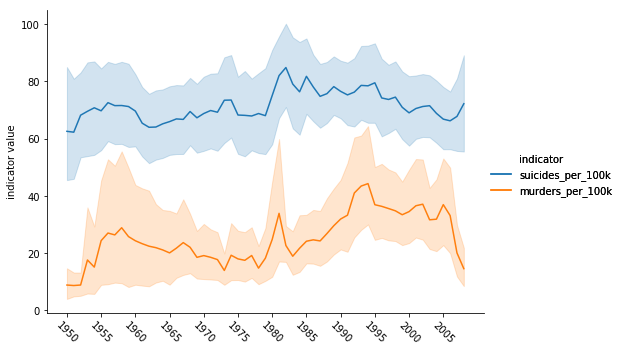

In [471]:
# Plot the means with default 95% confidence intervals. 
g = sns.relplot(x='year', y='value', hue='indicator', 
        kind='line', data=df_no_zeroes)

g.map(plt.xticks,rotation=-45, color='black')
g.set(ylabel='indicator value')
g.set(xticks=np.arange(0, 60, step=5))
g.add_legend();

It is clear that the mean rate of suicides is around double that of the rate of murders. There seems to be an increasing trend in the number of murders between 1985 and 1995. However, caution is necessary because the countries contributing data tends to change from year to year, thus biasing a simple mean. Nevertheless, it would be interesting to see if the trends are different between the G20 countries and the others. 

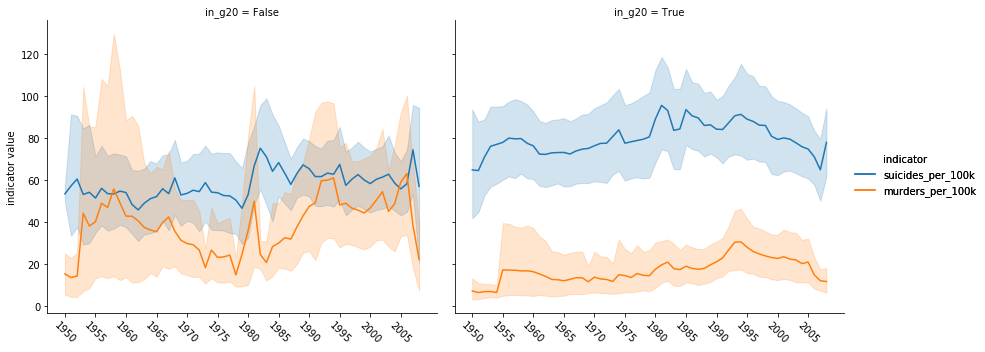

In [472]:
# Uses the col argument to group the data.
g = sns.relplot(x='year', y='value', hue='indicator', 
        col='in_g20', kind='line', data=df_no_zeroes)

g.map(plt.xticks,rotation=-45, color='black')
g.set(ylabel='indicator value')
g.set(xticks=np.arange(0, 60, step=5))
g.add_legend();

The above plots show an interesting effect that the mean murder rate across the G20 countries tends to be less than that of the non-G20 countries, but the suicide rate tends to be higher. The confidence intervals for the suicides in the non-G20 countries can be quite large, reflecting the smaller amount of available data from these countries. 

A better way to view the data would be on a per-country basis for all of the 75 countries from which data was available. To ease comparisons, where no data was available for a particular year, the lines drop down to zero. 

Creating grid of all countries. This might take a minute or two to render...
As in the previous figure, suicides are blue, murders are orange.


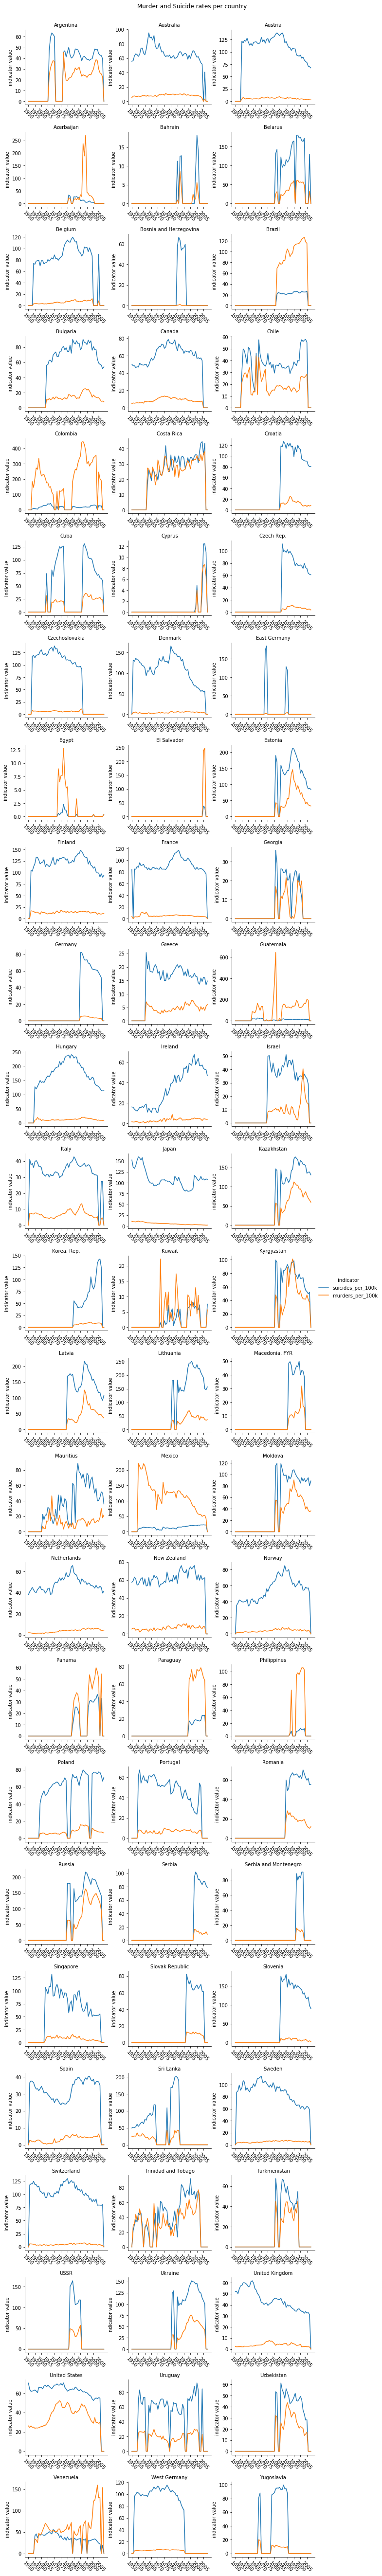

In [473]:
print("Creating grid of all countries. This might take a minute or two to render...")
print("As in the previous figure, suicides are blue, murders are orange.")
#TODO This is using a side-effect of sum in that missing values were "summed" to zero. 
# The df_no_zeroes dataframe has these replaced with NaN for calculating statistics. 
# Values of zero in these graphs indicate no data was available.
# The y axis is scaled independently. 
#TODO If the missing years were not set to zero per country, this might improve this plot. 
g = sns.FacetGrid(df_zeroes, col='country', hue='indicator', col_wrap=3,
        sharey=False, sharex=False);
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'value')
# Tidy the axes
g.map(plt.xticks,rotation=-45,  color='black')
g.set(ylabel='indicator value')
g.set(xticks=np.arange(0, 60, step=5))
# Add legend - pity it can't be placed at the top somewhere
g.add_legend()
# Control the title of each facet
g = g.set_titles("{col_name}")
# Add a title for the whole plot
plt.subplots_adjust(top=0.97)
g = g.fig.suptitle('Murder and Suicide rates per country');

These subplots show that some countries have limited data available. This may also be because a country has changed its identity - see West Germany, East Germany and Germany, for example. In this case these two were combined after the unification under the name, Germany.

Some show a correlation between suicide and murder rates, others have a minimal murder rate (orange) that is not changing much over time. Suicide rates (blue) are most often higher than murder rates.

### Q2. How do these rates change for different age groups?


In [474]:
# Select the indicators of interest for this question.
# No need to clean these, they are already filled out with NaN.
df_suicides_ages = df_c_melted.query("indicator in ['suicides_0-14', 'suicides_15-29', 'suicides_30-44', 'suicides_45-59', 'suicides_60+']")
df_murders_ages = df_c_melted.query("indicator in ['murders_0-14', 'murders_15-29', 'murders_30-44', 'murders_45-59', 'murders_60+']")

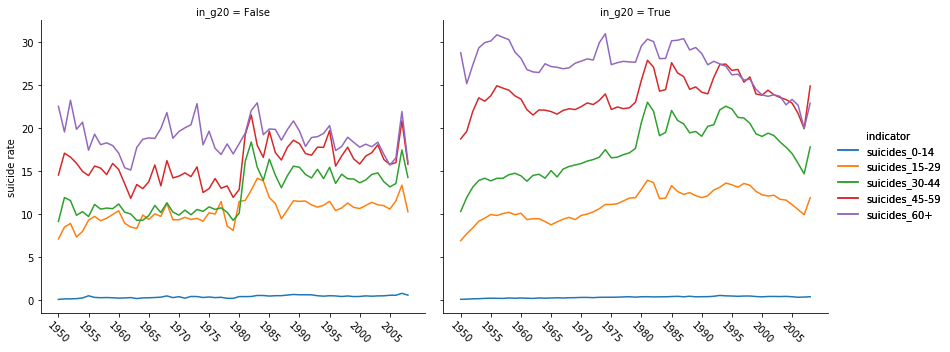

In [475]:
# Uses the col argument to group the data. Confidence intervals are switched off for clarity.
g = sns.relplot(x='year', y='value', hue='indicator', 
        col='in_g20', kind='line', ci=None, data=df_suicides_ages)

g.map(plt.xticks,rotation=-45, color='black')
g.set(ylabel='suicide rate')
g.set(xticks=np.arange(0, 60, step=5))
g.add_legend();

Suicides are more frequent as the age group increases with age, with the 60+ age group having the most suicides. The mean across G20 countries is about the same as non-G20 countries for the 15-29 age group, whereas the other age groups tend to be higher.  

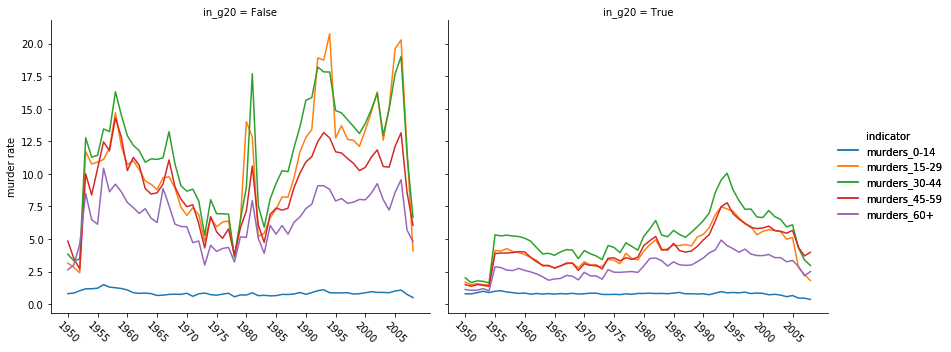

In [476]:
# Uses the col argument to group the data. Confidence intervals are switched off for clarity.
g = sns.relplot(x='year', y='value', hue='indicator', 
        col='in_g20', kind='line', ci=None, data=df_murders_ages)

g.map(plt.xticks,rotation=-45, color='black')
g.set(ylabel='murder rate')
g.set(xticks=np.arange(0, 60, step=5))
g.add_legend();

Murders of people in age group 15-29 have some periods of being the highest category in the non-G20 countries. In general, people in age group 30-44 are most often victims of murder. Least often is the age group 60+, the group that was most often in suicides. 

### Q3. Is there a correlation between murder and suicide rates?

Correlation coefficient of suicides vs. murders in G20 countries: 0.232703
Correlation coefficient of suicides vs. murders in non-G20 countries: 0.214092


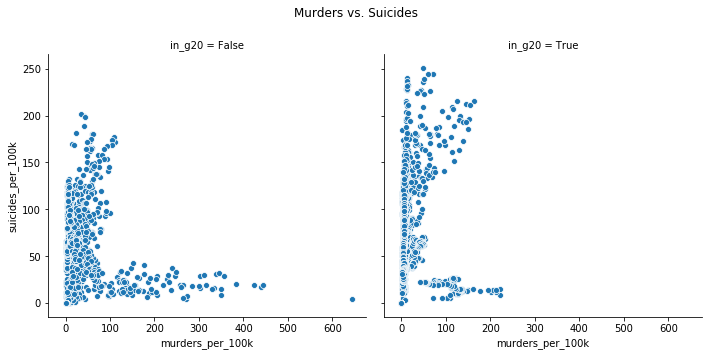

In [477]:
# Create dataframes for each category 
df_in_g20 = df_c[df_c['in_g20'] == True]
df_not_in_g20 = df_c[df_c['in_g20'] == False]
# Calculate correlations
corr_g20 = df_in_g20['suicides_per_100k'].corr(df_in_g20['murders_per_100k'])
print("Correlation coefficient of suicides vs. murders in G20 countries: {0:4f}".format(corr_g20))
corr_not_g20 = df_not_in_g20['suicides_per_100k'].corr(df_not_in_g20['murders_per_100k'])
print("Correlation coefficient of suicides vs. murders in non-G20 countries: {0:4f}".format(corr_not_g20))

# Show scatter plots
g = sns.relplot(x='murders_per_100k', y='suicides_per_100k', col='in_g20', kind='scatter', data=df_c)
plt.subplots_adjust(top=0.85)
g = g.fig.suptitle('Murders vs. Suicides');

There seems to be only a very weak correlation between murders and suicides per country per year. There is a cluster of countries (near the x axis) that have low suicide rates but high murder rates. In the next question the correlation across countries of mean rates from and including the year 2000 will also be generated. 

### Q4. Do the mean murder and suicide rates since the year 2000 across all countries correlate with other indicators for that period?

In [478]:
# There are zeroes in the total columns that need to be removed (sums of NaN).
# Also there are sporadic zeroes in the other indicators. These might be legitimate values
# but some are suspect. For this comparison, all zero values will be removed and the mean used.

df_c_no_zeroes = df_c.replace(0.0,np.nan)
df_c_no_zeroes.drop(columns=['suicides_0-14', 'suicides_15-29', 'suicides_30-44', 
        'suicides_45-59', 'suicides_60+', 'murders_0-14', 'murders_15-29', 
        'murders_30-44', 'murders_45-59', 'murders_60+'], inplace=True)
# Prepare the mean values of all indicator values from and including the year 2000

df_mean_indicators = df_c_no_zeroes.query('year > "1999"').groupby(
        ['country'],as_index=False).mean()
df_mean_indicators.drop(columns=['country'], inplace=True)

Correlations between variables:
                   suicides_per_100k  murders_per_100k
suicides_per_100k            1.00000          -0.06409
murders_per_100k            -0.06409           1.00000


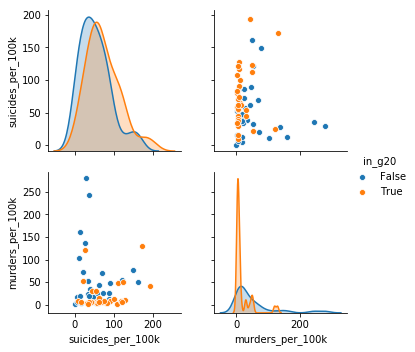

In [479]:
# Compare means of suicide and murder rates for period
df_pairset1 = df_mean_indicators[['in_g20', 'suicides_per_100k','murders_per_100k']].copy()
df_pairset1.dropna(inplace=True)
corr1 = df_pairset1.drop(columns='in_g20').corr()
print('Correlations between variables:')
print(corr1)
sns.pairplot(df_pairset1, vars=['suicides_per_100k','murders_per_100k'], 
        hue='in_g20');

There is no correlation across the countries for mean rates from and including the year 2000. 
Although the country plots earlier showed some countries with correlating murder and suicide rates (see for example Russia and Costa Rica), in general these rates do not correlate with each other. Now each of these rates can be compared to mean values for the other indicators in the same time period. All zeroes are removed prior to generating the means. There are four sets of comparisons, suicides and murders each against two sets of variables. (Variables in each set might correlate with variables in other sets, but that is not the focus here). 

Suicide rates vs. first set of other indicators:

Correlations between variables:
                     suicides_per_100k  unemployment_rate  \
suicides_per_100k             1.000000           0.438718   
unemployment_rate             0.438718           1.000000   
alcohol_consumption           0.676113           0.586547   
middle_income                 0.378399           0.219500   
inequality_index             -0.408521          -0.145504   

                     alcohol_consumption  middle_income  inequality_index  
suicides_per_100k               0.676113       0.378399         -0.408521  
unemployment_rate               0.586547       0.219500         -0.145504  
alcohol_consumption             1.000000       0.597856         -0.562039  
middle_income                   0.597856       1.000000         -0.967322  
inequality_index               -0.562039      -0.967322          1.000000  


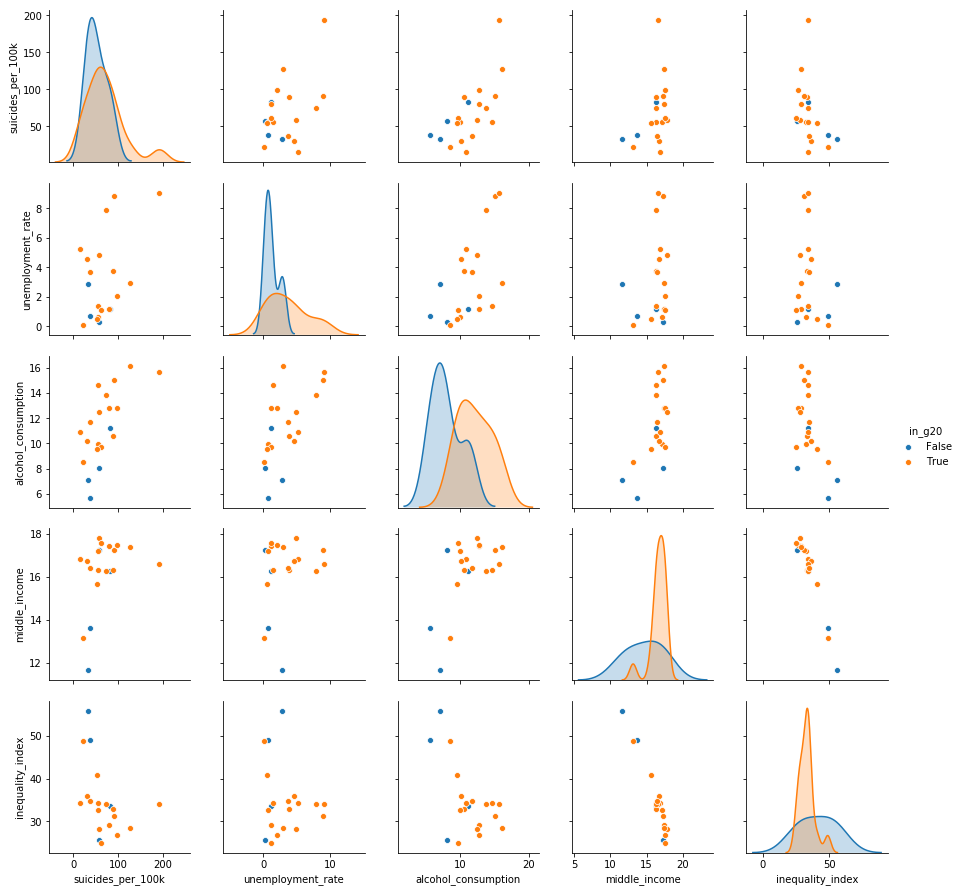

In [480]:
# Compare means of suicides and other indicators for period - part 1

df_pairset2 = (df_mean_indicators[['in_g20', 'suicides_per_100k', 
        'unemployment_rate', 'alcohol_consumption', 'middle_income', 'inequality_index']].copy())
df_pairset2.dropna(inplace=True)
corr2 = df_pairset2.drop(columns='in_g20').corr()
print('Correlations between variables:')
print(corr2)
g = sns.pairplot(df_pairset2, vars=['suicides_per_100k', 
        'unemployment_rate', 'alcohol_consumption', 'middle_income', 'inequality_index'], 
        hue='in_g20');

Suicide rates vs. second set of other indicators:

Correlations between variables:
                   suicides_per_100k  literacy_rate  doctors_per_1K  \
suicides_per_100k           1.000000       0.521593        0.531202   
literacy_rate               0.521593       1.000000        0.446849   
doctors_per_1K              0.531202       0.446849        1.000000   
extreme_poverty            -0.591236      -0.231723       -0.392539   
poverty                    -0.658429      -0.355913       -0.335602   

                   extreme_poverty   poverty  
suicides_per_100k        -0.591236 -0.658429  
literacy_rate            -0.231723 -0.355913  
doctors_per_1K           -0.392539 -0.335602  
extreme_poverty           1.000000  0.952735  
poverty                   0.952735  1.000000  


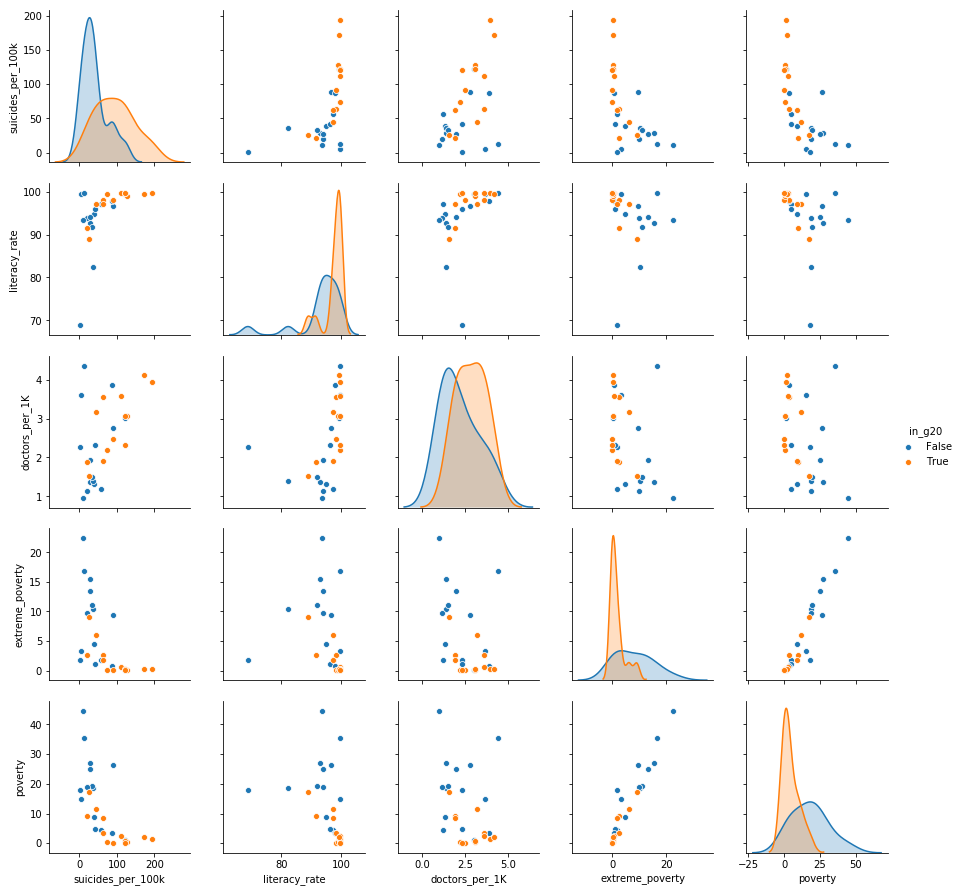

In [481]:
# Compare means of suicides and other indicators for period - part 2

df_pairset3 = (df_mean_indicators[['in_g20', 'suicides_per_100k',
        'literacy_rate', 'doctors_per_1K', 'extreme_poverty', 'poverty']].copy())
df_pairset3.dropna(inplace=True)
corr3 = df_pairset3.drop(columns='in_g20').corr()
print('Correlations between variables:')
print(corr3)
g = sns.pairplot(df_pairset3, vars=['suicides_per_100k',
        'literacy_rate', 'doctors_per_1K', 'extreme_poverty', 'poverty'], 
        hue='in_g20');

Murder rates vs. first set of other indicators:

Correlations between variables:
                     murders_per_100k  unemployment_rate  alcohol_consumption  \
murders_per_100k             1.000000          -0.059778            -0.372058   
unemployment_rate           -0.059778           1.000000             0.586547   
alcohol_consumption         -0.372058           0.586547             1.000000   
middle_income               -0.834788           0.219500             0.597856   
inequality_index             0.814321          -0.145504            -0.562039   

                     middle_income  inequality_index  
murders_per_100k         -0.834788          0.814321  
unemployment_rate         0.219500         -0.145504  
alcohol_consumption       0.597856         -0.562039  
middle_income             1.000000         -0.967322  
inequality_index         -0.967322          1.000000  


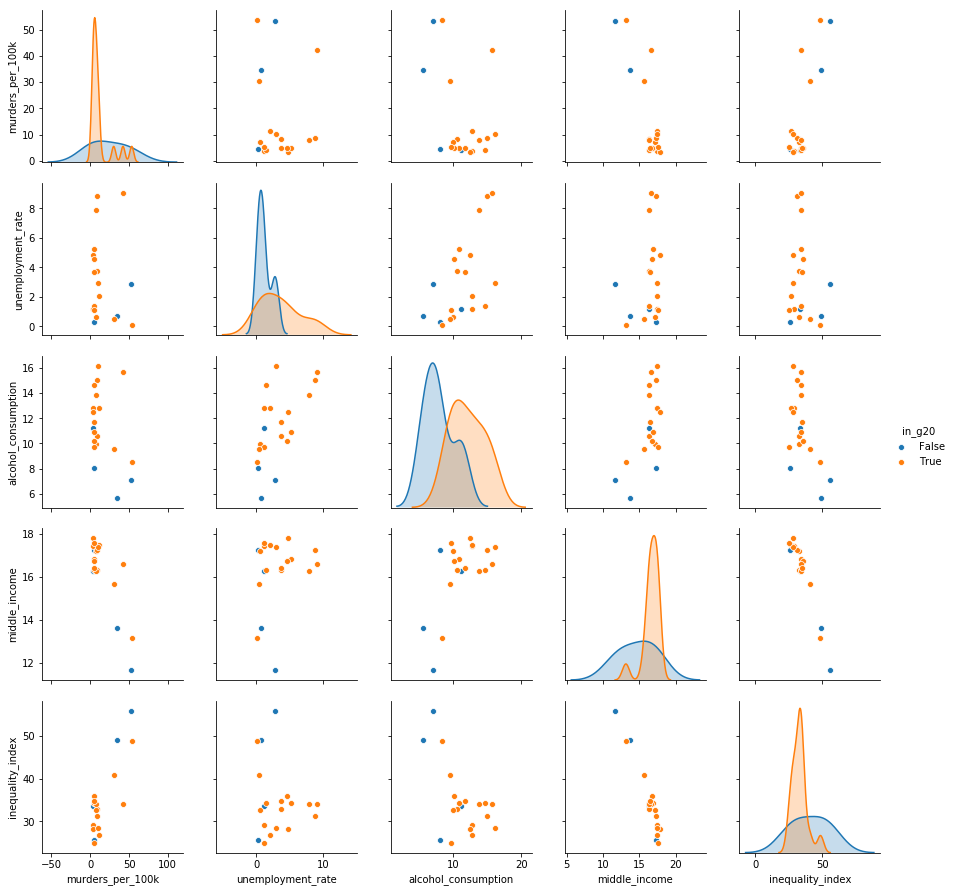

In [482]:
# Compare means of murders and other indicators for period - part 1

df_pairset4 = (df_mean_indicators[['in_g20', 'murders_per_100k', 
        'unemployment_rate', 'alcohol_consumption', 'middle_income', 'inequality_index']].copy())
df_pairset4.dropna(inplace=True)
corr4 = df_pairset4.drop(columns='in_g20').corr()
print('Correlations between variables:')
print(corr4)
sns.pairplot(df_pairset4, vars=['murders_per_100k', 
        'unemployment_rate', 'alcohol_consumption', 'middle_income', 'inequality_index'], 
        hue='in_g20');

Murder rates vs. second set of other indicators:

Correlations between variables:
                  murders_per_100k  literacy_rate  doctors_per_1K  \
murders_per_100k          1.000000      -0.282077       -0.362012   
literacy_rate            -0.282077       1.000000        0.446849   
doctors_per_1K           -0.362012       0.446849        1.000000   
extreme_poverty           0.545317      -0.231723       -0.392539   
poverty                   0.426637      -0.355913       -0.335602   

                  extreme_poverty   poverty  
murders_per_100k         0.545317  0.426637  
literacy_rate           -0.231723 -0.355913  
doctors_per_1K          -0.392539 -0.335602  
extreme_poverty          1.000000  0.952735  
poverty                  0.952735  1.000000  


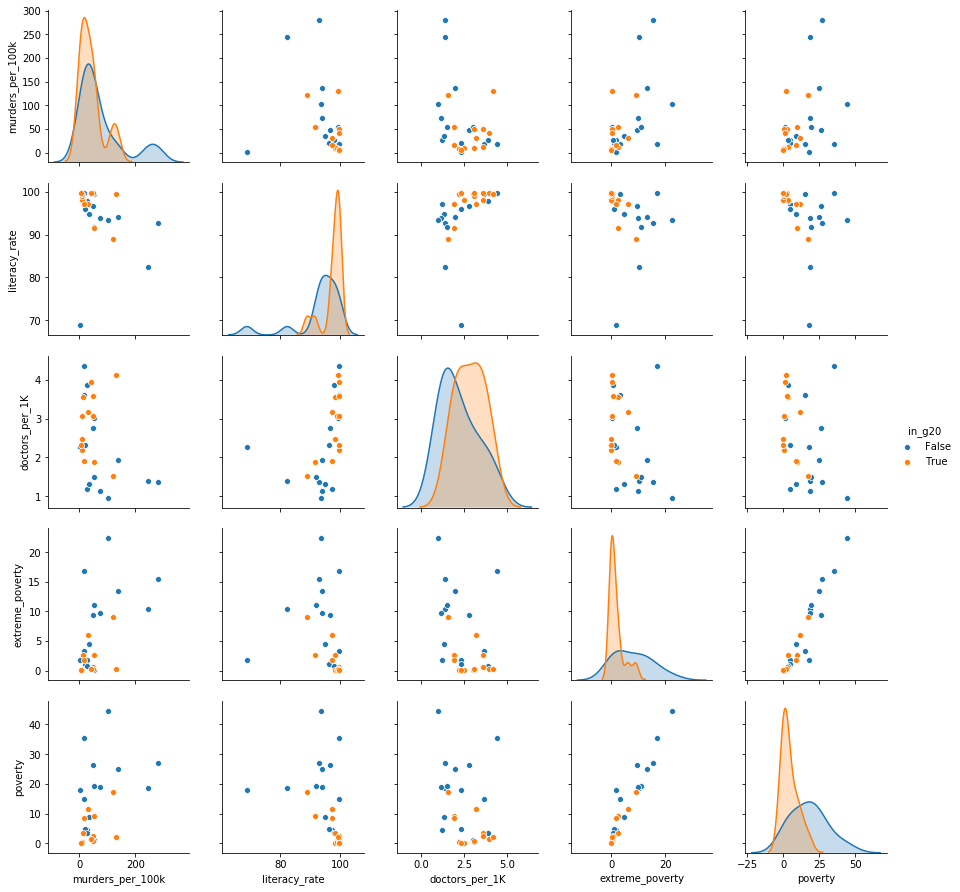

In [483]:
# Compare means of murders and other indicators for period - part 2

df_pairset5 = (df_mean_indicators[['in_g20', 'murders_per_100k',
        'literacy_rate', 'doctors_per_1K', 'extreme_poverty', 'poverty']].copy())
df_pairset5.dropna(inplace=True)
corr5 = df_pairset5.drop(columns='in_g20').corr()
print('Correlations between variables:')
print(corr5)
sns.pairplot(df_pairset5, vars=['murders_per_100k',
        'literacy_rate', 'doctors_per_1K', 'extreme_poverty', 'poverty'], 
        hue='in_g20');

<a id='conclusions'></a>
## Conclusions

The following conclusions may be drawn from this analysis:
<ul>
    <li>The trends of murder and suicide rates varies considerably from country to country. However, in general, suicide rates are much higher (ca. double on average) than murder rates. </li>
    <li>The mean murder rate across the G20 countries tends to be less than that of the non-G20 countries, but the suicide rate tends to be higher.</li>
    <li>The age group 60+ is the lowest group for murder rate, but highest for suicide rate. This is true both inside and outside the G20. </li>
    <li>Whereas murder rates show a positive correlation with measures of povery or extreme poverty, suicide rates show the reverse: a negative correlation. </li>
    <li>Factors that tend to correlate (|r|>0.5) with the suicide rate (does not necessarily imply causality) are:
    <ul>
        <li>alcohol consumption</li>
        <li>literacy rate</li>
        <li>doctors per 1000 population</li>
        <li>poverty and extreme poverty (negative: more poverty with less suicides)</li>
    </ul>
    </li>
    <li>Factors that tend to correlate (|r|>0.5) with the suicide rate (does not necessarily imply causality) are:
    <ul>
        <li>middle income</li>
        <li>inequality index</li>
        <li>poverty and extreme poverty (positive: more poverty with more murders)</li>
    </ul>
    </li>
</ul>

<a id='recommendations'></a>
## Further Recommendations
<ol>
    <li>Building mean values over several countries gives equal weight to large and small countries. This is problematic when building the categories within and outside the G20, for example. An alternative that weights the countries, e.g. by population, may deliver a new perspective.
    </li>
    <li>For countries that change their name over time, generic names could be created and mapped to the various variations, which would make the examination of trends easier.</li>
    <li>There may be other groupings of countries that would provide better contrasts. For example, by continent as is often used in Gapminder. Or the G7, P5 or some other <a href="https://en.wikipedia.org/wiki/List_of_country_groupings">grouping</a>. One issue, for example, is that the quality and quantity of data and reporting is generally better in the G20 countries that in the rest.</li>
    <li>Hypotheses can be constructed on a per-country basis (e.g. impact of wars and gang warfare on murder rate) and for the aggregated data (affluent countries such as those in the G20 have higher suicide rates). The overall rates could also be checked for influence by the numbers in each age group. For example, if in a group of countries fewer people live to be 60+, the overall rate of suicide may be lower, since this group tends to have the highest number of suicides.</li>
 
</ol>

<a id='appendix'></a>

## Appendix
In this section are cells with useful commands that can be adapted to inspect of further explore the data. 

The combined data can be saved here as a single csv file. A semicolon separator is used to prevent issues arising due to some country names including commas (e.g. "Korea, Rep." First remove the hash - this command was commented out in case the reader runs all the cells.  

In [484]:
# The use of a semicolon as separator is deliberate as some 
# country names include commas, which confuses df.to_csv.
#REMOVE THIS#df_c.to_csv('suicides_murders.csv', sep=";", index=False)

Further investigations and exploration can begin by loading in this file. First remove the hash - this command was commented out in case the reader runs all the cells.  

In [485]:
# The csv was saved with semicolon separator.
#REMOVE THIS#df_c = pd.read_csv('suicides_murders.csv',sep=';')

The following cells provide an overview of a set of data. 
Set the dataframe in the first cell.

The following dataframes are available (if notebook fully executed):
<ul>
<li>df_s00 suicides_per_100K, 0-14</li>
<li>df_s15 suicides_per_100K, 15-29</li>
<li>df_s30 suicides_per_100K, 30-44</li>
<li>df_s45 suicides_per_100K, 45-59</li>
<li>df_s60 suicides_per_100K, 60+</li>



<li>df_m00 murders_per_100K, 0-14</li>
<li>df_m15 murders_per_100K, 15-29</li>
<li>df_m30 murders_per_100K, 30-44</li>
<li>df_m45 murders_per_100K, 45-59</li>
<li>df_m60 murders_per_100K, 60+</li>



<li>df_ltu unemployment_rate</li>
<li>df_acs alcohol_consumption</li>
<li>df_cpc corruption_perception</li>
<li>df_pv1 extreme_poverty</li>
<li>df_ism middle_income</li>
<li>df_iqi inequality_index</li>
<li>df_lra literacy_rate</li>
<li>df_mdr doctors_per_1K</li>
<li>df_pv2 poverty</li>
Note that any of the above can be suffixed with 'f' to view the raw input file. However, not all cells may run correctly (e.g. due to indexing changes). 
<li>df_s is a combination of the suicides age range dataframes</li>
<li>df_m is a combination of the murders age range dataframes</li>
</ul>

In [486]:
# Set the dataframe for the following summaries. 
# Default is the combined dataframe.
df = df_c

In [487]:
# Peek at the first rows of the dataset.
df.head()

,country,year,in_g20,suicides_0-14,suicides_15-29,suicides_30-44,suicides_45-59,suicides_60+,murders_0-14,murders_15-29,...,murders_per_100k,unemployment_rate,alcohol_consumption,corruption_perception,middle_income,inequality_index,literacy_rate,doctors_per_1K,extreme_poverty,poverty
0,Argentina,1950,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,1951,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,1952,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,1953,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,1954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
# Print the column labels in the combined dataframe.
for i, v in enumerate(df.columns):
    print(i, v)

0 country
1 year
2 in_g20
3 suicides_0-14
4 suicides_15-29
5 suicides_30-44
6 suicides_45-59
7 suicides_60+
8 murders_0-14
9 murders_15-29
10 murders_30-44
11 murders_45-59
12 murders_60+
13 suicides_per_100k
14 murders_per_100k
15 unemployment_rate
16 alcohol_consumption
17 corruption_perception
18 middle_income
19 inequality_index
20 literacy_rate
21 doctors_per_1K
22 extreme_poverty
23 poverty


In [489]:
df['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Rep.', 'Czechoslovakia', 'Denmark',
       'East Germany', 'Egypt', 'El Salvador', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Hungary',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.',
       'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Macedonia, FYR',
       'Mauritius', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand',
       'Norway', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Serbia', 'Serbia and Montenegro',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sri Lanka',
       'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Turkmenistan',
       'USSR', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay',
       '

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4425 entries, 0 to 4424
Data columns (total 24 columns):
country                  4425 non-null object
year                     4425 non-null object
in_g20                   4425 non-null bool
suicides_0-14            2535 non-null float64
suicides_15-29           2535 non-null float64
suicides_30-44           2535 non-null float64
suicides_45-59           2535 non-null float64
suicides_60+             2535 non-null float64
murders_0-14             2537 non-null float64
murders_15-29            2537 non-null float64
murders_30-44            2537 non-null float64
murders_45-59            2537 non-null float64
murders_60+              2537 non-null float64
suicides_per_100k        4425 non-null float64
murders_per_100k         4425 non-null float64
unemployment_rate        690 non-null float64
alcohol_consumption      164 non-null float64
corruption_perception    67 non-null float64
middle_income            269 non-null float64
inequality

In [491]:
df.shape

(4425, 24)

In [492]:
df.columns

Index(['country', 'year', 'in_g20', 'suicides_0-14', 'suicides_15-29',
       'suicides_30-44', 'suicides_45-59', 'suicides_60+', 'murders_0-14',
       'murders_15-29', 'murders_30-44', 'murders_45-59', 'murders_60+',
       'suicides_per_100k', 'murders_per_100k', 'unemployment_rate',
       'alcohol_consumption', 'corruption_perception', 'middle_income',
       'inequality_index', 'literacy_rate', 'doctors_per_1K',
       'extreme_poverty', 'poverty'],
      dtype='object')

In [493]:
df.isnull().sum()

country                     0
year                        0
in_g20                      0
suicides_0-14            1890
suicides_15-29           1890
suicides_30-44           1890
suicides_45-59           1890
suicides_60+             1890
murders_0-14             1888
murders_15-29            1888
murders_30-44            1888
murders_45-59            1888
murders_60+              1888
suicides_per_100k           0
murders_per_100k            0
unemployment_rate        3735
alcohol_consumption      4261
corruption_perception    4358
middle_income            4156
inequality_index         4007
literacy_rate            4283
doctors_per_1K           2775
extreme_poverty          4023
poverty                  4032
dtype: int64

In [494]:
# TOOL count of countries in data
years_with_values = df.groupby(by=['year', 'country']).count()
years_with_values.groupby(by='year').sum()

,in_g20,suicides_0-14,suicides_15-29,suicides_30-44,suicides_45-59,suicides_60+,murders_0-14,murders_15-29,murders_30-44,murders_45-59,...,murders_per_100k,unemployment_rate,alcohol_consumption,corruption_perception,middle_income,inequality_index,literacy_rate,doctors_per_1K,extreme_poverty,poverty
year,,,,,,,,,,,,,,,,,,,,,
1950,75,10,10,10,10,10,10,10,10,10,...,75,0,0,0,0,0,0,0,0,0
1951,75,16,16,16,16,16,16,16,16,16,...,75,0,0,0,0,0,0,0,0,0
1952,75,19,19,19,19,19,19,19,19,19,...,75,0,0,0,0,0,0,0,0,0
1953,75,21,21,21,21,21,21,21,21,21,...,75,0,0,0,0,0,0,0,0,0
1954,75,22,22,22,22,22,22,22,22,22,...,75,0,0,0,0,0,0,0,0,0
1955,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1956,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1957,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0
1958,75,29,29,29,29,29,29,29,29,29,...,75,0,0,0,0,0,0,0,0,0


In [495]:
# Sample of a particular country in dataframe.
df[df['country'] == 'Korea, Rep.'].head()

,country,year,in_g20,suicides_0-14,suicides_15-29,suicides_30-44,suicides_45-59,suicides_60+,murders_0-14,murders_15-29,...,murders_per_100k,unemployment_rate,alcohol_consumption,corruption_perception,middle_income,inequality_index,literacy_rate,doctors_per_1K,extreme_poverty,poverty
2124,"Korea, Rep.",1950,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125,"Korea, Rep.",1951,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2126,"Korea, Rep.",1952,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,"Korea, Rep.",1953,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,"Korea, Rep.",1954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The following tool is useful when bringing in new data sources, to visually scan for country name variations. 

In [496]:
# TOOL: visually examine an ordered list of country names from all sources.
# Uses .extend in order to avoid creating a list of lists.
country_list = []
country_list.extend(list(df_s00['country'].unique())) 
country_list.extend(list(df_s15['country'].unique())) 
country_list.extend(list(df_s30['country'].unique())) 
country_list.extend(list(df_s45['country'].unique())) 
country_list.extend(list(df_s60['country'].unique())) 
country_list.extend(list(df_m00['country'].unique())) 
country_list.extend(list(df_m15['country'].unique())) 
country_list.extend(list(df_m30['country'].unique())) 
country_list.extend(list(df_m45['country'].unique())) 
country_list.extend(list(df_m60['country'].unique())) 
country_list.extend(list(df_ltu['country'].unique())) 
country_list.extend(list(df_acs['country'].unique())) 
country_list.extend(list(df_cpc['country'].unique())) 
country_list.extend(list(df_pv1['country'].unique()))
country_list.extend(list(df_ism['country'].unique())) 
country_list.extend(list(df_iqi['country'].unique())) 
country_list.extend(list(df_lra['country'].unique())) 
country_list.extend(list(df_mdr['country'].unique())) 
country_list.extend(list(df_pv2['country'].unique()))
cdf = pd.DataFrame(country_list)
cdf.columns = ['Country']
cdf.sort_values('Country', inplace=True)
cdf['Country'].unique()

array(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Rep.',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Christian',
       'Christmas Island', 'Coastline', 'Cocos Island', 'Colombia',
       'Comoros', 'Congo [DRC]', 'Congo [Republic]', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cook Is', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
       'C

Thanks Seaborn! Play it again, Sam Nelson!


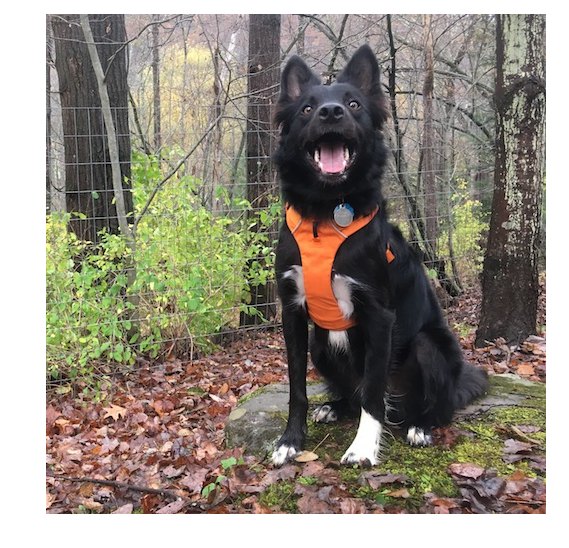

In [497]:
print("Thanks Seaborn! Play it again, Sam Nelson!")
sns.dogplot()